## AutoEncode 노이즈 제거
---
- 데이터 노이즈 제거 활용
- 데이터에서 주요 특징만 추출, 압축하기 때문에 노이즈는 제거됨
- 압축된 주요 특징으로 데이터 복원 > 노이즈 제거

AutoEncoder ( Transfer Learning )
- 노이즈 제거
- 표현(특징) 학습
    - 데이터에서 주요 특징을 찾아 앞축 후 복원하는 학습 모델
- 구성
    - 인코더 : 입력 데이터에서 주요 특징을 추출
    - 디코더 : 주요 특징에서 원 데이터로 복원

In [1]:
import PIL.Image as Image
def pre_img(path):

    # 이미지 불러오기
    test_image=Image.open(path).resize((540,420))
    test_image = test_image.convert('L')
    test_image_arr=np.array(test_image).reshape(420,540,1)/255.0
    
#     # 이미지 그래프로 그리기
#     plt.imshow(test_image)
#     plt.show()

    return test_image_arr

In [4]:
import os 
import numpy as np
data_dir = './Noisy_Documents/'
data_names = os.listdir(data_dir+'noisy/')
input_data = np.array([pre_img(data_dir +'noisy/'+name) for name in data_names])
target_data = np.array([pre_img(data_dir +'clean/'+name) for name in data_names])


In [5]:
print(input_data.shape, target_data.shape)

(216, 420, 540, 1) (216, 420, 540, 1)


In [10]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(input_data, target_data, random_state=493)

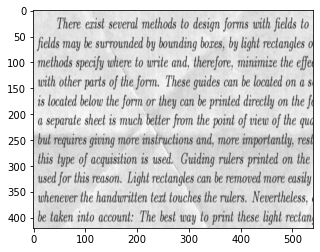

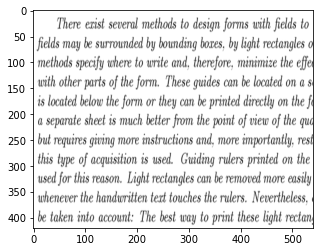

In [11]:
import matplotlib.pyplot as plt
plt.imshow(test_x[0], cmap ='gray')
plt.show()
plt.imshow(test_y[0], cmap ='gray')
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 420, 540, 32)      320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 210, 270, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 210, 270, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 70, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 70, 90, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 35, 45, 128)    

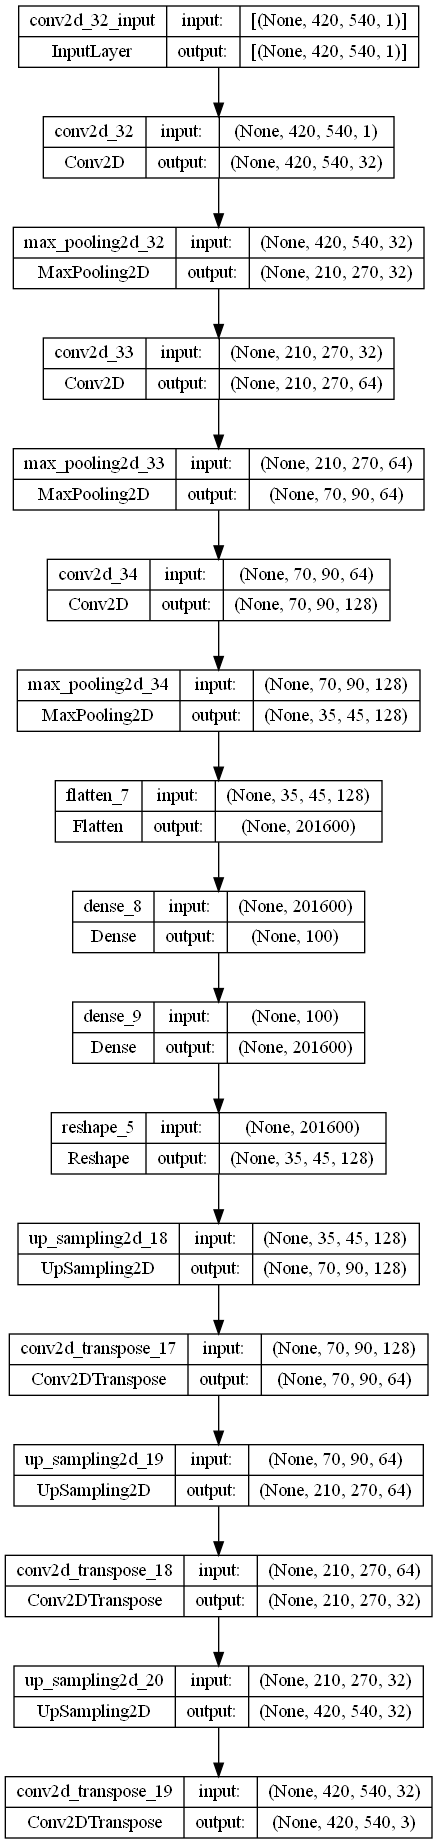

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D, Reshape, Flatten, Dense
from tensorflow.keras.utils import plot_model, set_random_seed
def make_model():
    set_random_seed(493)
    model = Sequential()
#     encoder

    model.add(Conv2D(filters = 32, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPool2D())    
    model.add(Conv2D(filters = 64, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPool2D((3,3)))  
    model.add(Conv2D(filters = 128, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPool2D())
    
#     병목층
    model.add(Flatten())
    model.add(Dense(
        100,
        activation = 'relu'
   ))
    model.add(Dense(
        35*45*128,
        activation = 'relu'
   ))
    model.add(Reshape((35, 45, 128)))
#     decoder
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(
        64,3,padding='same',
        activation = 'relu')
             )
              
    model.add(UpSampling2D((3,3)))
    model.add(Conv2DTranspose(
        32,3,padding='same',
        activation = 'relu')
             )
    
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(filters = 3, kernel_size=3, padding='same', activation='sigmoid'))
    
    model.summary()
    
    model.compile(
        optimizer='adam',
        loss = 'mean_squared_error',
        metrics = 'mean_squared_error'
    )
    return model

model = make_model()
plot_model(model,show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_cb = EarlyStopping(monitor = 'val_loss', patience = 3)
mc_cb = ModelCheckpoint(monitor= 'val_loss', filepath = './hw2_model2.h5',save_best_only=False)

result = model.fit(train_x, train_x,
         validation_split=0.2,
         epochs = 100,
         callbacks=[es_cb,mc_cb])

Epoch 1/100
2/5 [===========>..................] - ETA: 6:02 - loss: 0.1129 - mean_squared_error: 0.1129

In [ ]:

plt.style.use('ggplot')
for k in result.history.keys():
    plt.plot(result.epoch, result.history[k], label = k)
    
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model, load_model
model = load_model('./hw2_model2.h5')
model.evaluate(test_x,test_y)

In [ ]:
pred = model.predict(test_x[[0]])

In [ ]:

plt.imshow(test_x[0], cmap ='gray')
plt.show()
plt.imshow(pred[0], cmap ='gray')
plt.show()

In [ ]:

plt.imshow(train_x[0], cmap ='gray')
plt.show()
plt.imshow(model.predict(train_x[[0]])[0], cmap ='gray')
plt.show()

In [ ]:
from tensorflow.keras.models import save_model, load_model
save_model(model, './hw2_model_f.h5')